# Today's goals

Today we will go over some basic scientific computing tasks that will come up throughout the rest of the course. Broadly, the goal of today's lab is to spend some time in a Python Jupyter Notebook using SciPy/NumPy/Matplotlib, and to see how to make our way in this world with the aid of documentation, the internet, and some guessing. We will do this by working through the following concrete tasks:
 1. Write a little function
    - Plot it
    - Numerically compute its integral
 1. Find the probability density functions of a few common distributions and plot them
 1. Draw (pseudo)random samples from a few common distributions and plot histograms of these
 1. Plot a density histogram of samples from a distribution and overlay its probability density
 1. Read in some data and plot it
 1. Break our Git repositories and then fix them
 

# 1) Some little functions

In this exercise, we are going to spend some time with the functions
$$f(x) = e^{-\frac{x^2}{2e}}\text{ for } x \in \mathbb{R}$$ $$g(x) = \frac{1}{6}x^4e^{5-ex}\text{ for } x \in [0,\infty)$$
Both of these can be solved analytically, but today we're going to plot them and then compute their integrals numerically using SciPy. If time permits, we'll also find the exact solutions using a "magic trick" for integration that commonly appears in probability and statistics.

## 1) a.
Write two functions, called `f` and `g`, which take a real number (ok, a `float`) as input and returns the function values as defined above. Include a docstring. Your docstring magically becomes the `__doc__` attribute of your function; check this by running `f.__doc__`.

In [25]:
import numpy as np  # scipy inclues a np.exp() function which computes e^x
def f(x):
    """ Put your docstring describing f here! """
    term1 = np.exp(-x**2/(2*np.exp(1)))
    return(term1)
def g(x):
    """ Put your docstring describing g here! """
    term2 = x**4 * np.exp(5 - np.exp(1)*x)/6
    return(term2)
f.__doc__

' Put your docstring describing f here! '

## 1) b.
Plot both functions on the interval $[-10,10]$. Either don't evaluate $g$ for $x<0$ or take $g(x) = 0$ for $x<0$.
Do this by
 1. Creating an evenly spaced grid of points between $-10$ and $10$. It is OK to use a grid on $[-10,10]$ for `f` and a grid on $[0,10]$ for `g`. Hint: investigate the `np.linspace()` function.
 2. Evaluating the functions on this grid
 3. Plotting the functions using `plt.plot()`.

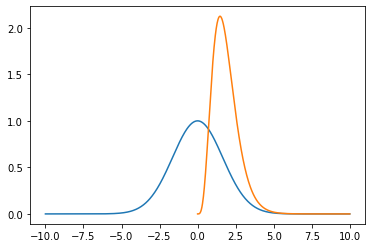

In [26]:
from matplotlib import pyplot as plt 
xf = np.linspace(-10,10,1000)
xg = np.linspace(0,10,500)
plt.plot(xf,f(xf))
plt.plot(xg,g(xg))
plt.show()

## 1) c.
Numerically integrate each function. Hint: you can do this with SciPy, but you will have to `import` a submodule. Try checking `?scipy`.

For either of them, do you have a guess for the analytical value of the integral?

In [27]:
from scipy import integrate as integrate
integrate.quad(f,a=-np.inf,b=np.inf)

(4.132731354122493, 1.1797863443138432e-08)

In [28]:
integrate.quad(g,a=0,b=np.inf)

(4.000000000000001, 1.9096475411374233e-08)

# 2) Probability distributions in SciPy

SciPy has utilities for dealing with probability distributions. We are going to do some basic tasks with the normal and gamma distributions

## 2) a.
First, let's deal with the gamma distribution. Consider a $\text{Gamma}(\alpha=5,\theta=1/3)$ distribution. This distribution has probability density function $$f(x) = \frac{1}{\Gamma(\alpha)\theta^\alpha} x^{\alpha-1}e^{-x/\theta}.$$

Plot the p.d.f. of this distribution. Do it without writing a function for the p.d.f., but instead use an instance of the `scipy.stats.gamma` object. 

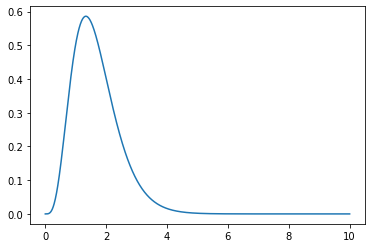

In [29]:
from scipy import stats as stats
gam = stats.gamma(a=5,scale=1/3) # Create "frozen" instance of gamma(a=5,b=3)
x = np.linspace(0,10,1000)
plt.plot(x,gam.pdf(x))
plt.show()

## 2) b.
Now, draw an i.i.d. sample of size $n=1000$, $X_i \sim \text{Gamma}(\alpha=5,\beta=1/3)$ from this distribution. You can use the same `gamma` object as you used for plotting the probability density function. Plot a histogram of these samples. Can you overlay the probability density?

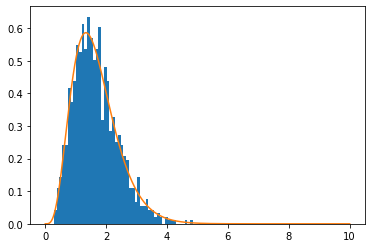

In [30]:
samps = gam.rvs(size=1000)
plt.hist(samps,density=True,bins=50)
plt.plot(x,gam.pdf(x))
plt.show()

## 2) c.
What is the sample mean of the sample you drew in the above question? What is the "population" mean, i.e. $\mathbb{E}[X_1]$? Can you compute it by hand? Can you compute it using the `gamma` object?

In [31]:
print(np.mean(samps)) # Sample mean
print(gam.mean()) # From `gamma` object
print(5/3) # By hand

1.6664804279257988
1.6666666666666665
1.6666666666666667


## 2) d.
Compute an estimate of $\mathbb{E}[\sin(X_i)]$ using your sample. Can you compute this with the `gamma` object?

In [32]:
print(np.mean(np.sin(samps)))
print(gam.expect(np.sin))

0.7747799345608157
0.7678799999999998


## 2) e.
Do all of the above for an i.i.d. sample of size $n=1000$, $Y_i \sim \text{N}(\mu=3,\sigma=4)$. Plots should be on $[-17,23]$.

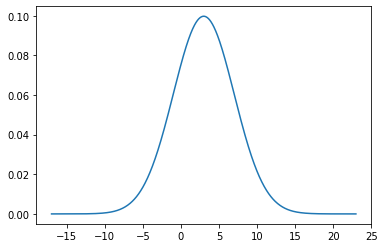

In [33]:
nor = stats.norm(loc=3,scale=4) # Create "frozen" instance of gamma(a=5,b=3)
x = np.linspace(-17,23,1000)
plt.plot(x,nor.pdf(x))
plt.show()

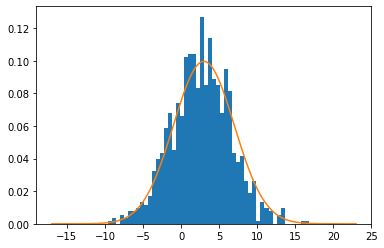

In [34]:
samps = nor.rvs(size=1000)
plt.hist(samps,density=True,bins=50)
plt.plot(x,nor.pdf(x))
plt.show()


In [35]:
print(np.mean(samps)) # Sample mean
print(nor.mean()) # From `gamma` object

2.6728733420643795
3.0


In [36]:
print(np.mean(np.sin(samps)))
print(nor.expect(np.sin))

-0.007648874797125225
4.734048875338834e-05


# 3.
Read in the `co2.csv` file and plot the first column (year) on the x-axis, second column (co2 concentration) on the y-axis. Be careful about types! Python may try to read your data as strings rather than numbers.

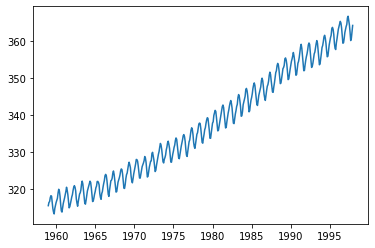

In [37]:
## I've always opened a raw CSV file and read it in using the csv module from
## base Python, but someone in lab informed me that there's a sane way to 
## read a CSV file using pandas:
import pandas
co2_data = pandas.read_csv("co2.csv")
plt.plot(co2_data.year,co2_data.co2)
plt.show()